Author: Your name

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [ ]:
df = pd.read_csv("loan_customer.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

In [ ]:
df.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE


In [ ]:
# Pengelompokan kolom berdasarkan jenisnya
nums = ['birth_date', 'phone_number', 'dependents', 'applicant_income', 'coapplicant_income', 'loan_amount', 'loan_term_month', 'loan_term_year', 'credit_history']
cats = ['load_id', 'gender', 'married', 'education', 'self_employed', 'has_credit_card', 'property_type', 'loan_status']

# Data Cleansing

## Handling missing values

In [ ]:
df.isna().sum()

loan_id                 0
birth_date             49
phone_number           52
gender                 13
married                 3
dependents             16
education               1
self_employed          33
applicant_income        9
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history         51
has_credit_card       533
property_type           1
loan_status             0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

loan_id               0
birth_date            0
phone_number          0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_term_month       0
loan_term_year        0
credit_history        0
has_credit_card       0
property_type         0
loan_status           0
dtype: int64

## Handling duplicated data

In [ ]:
df.duplicated().sum()

0

In [ ]:
# drop duplicated rows
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0
0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Handling Outlier

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

for col in ['applicant_income', 'credit_history']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    low_limit = Q1 - 1.5*IQR
    high_limit = Q3 + 1.5*IQR
    df = df[(df[col] >= low_limit) & (df[col] <= high_limit)]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 52
Jumlah baris setelah memfilter outlier: 43


## Feature Encoding

In [ ]:
cats_updated = ['gender', 'married', 'education']

for col in cats_updated:
    print(f'value counts of column {col}')
    print(df[col].value_counts())
    print('---'*10, '\n')

value counts of column gender
Male      35
Female     8
Name: gender, dtype: int64
------------------------------ 

value counts of column married
Yes    27
No     16
Name: married, dtype: int64
------------------------------ 

value counts of column education
Graduate        32
Not Graduate    11
Name: education, dtype: int64
------------------------------ 



In [ ]:
mapping_property_type = {
    'house' : 0,
    'studio' : 1,
    'apartment' : 2
}

mapping_married = {
    'No' : 0,
    'Yes' : 1
}

mapping_loan_status = {
    'REJECT' : 0,
    'APPROVE' : 1
}

mapping_has_credit_card = {
    'no' : 0,
    'yes' : 1
}

df['property_type'] = df['property_type'].map(mapping_property_type)
df['married'] = df['married'].map(mapping_married)
df['loan_status'] = df['loan_status'].map(mapping_loan_status)
df['has_credit_card'] = df['has_credit_card'].map(mapping_has_credit_card)

In [ ]:
for cat in ['education', 'self_employed']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [ ]:
df = df.drop(columns=['education', 'self_employed'])

In [ ]:
df.head()

,loan_id,birth_date,phone_number,gender,married,dependents,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes
12,LP001028,1987-11-16,6.281128e+11,Male,1,2,3073.0,8106.0,200000,360,30,1.0,0,0,1,1,0,1,0
21,LP001046,1984-06-25,6.285219e+11,Male,1,1,5955.0,5625.0,315000,360,30,1.0,0,0,1,1,0,1,0
26,LP001068,1986-09-10,6.281377e+11,Male,1,0,2799.0,2253.0,122000,360,30,1.0,0,2,1,1,0,1,0
27,LP001073,1989-02-05,6.281346e+11,Male,1,2,4226.0,1040.0,110000,360,30,1.0,1,0,1,0,1,1,0
28,LP001086,1978-11-21,6.285222e+10,Male,0,0,1442.0,0.0,35000,360,30,1.0,0,0,0,0,1,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 12 to 613
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_id                 43 non-null     object 
 1   birth_date              43 non-null     object 
 2   phone_number            43 non-null     float64
 3   gender                  43 non-null     object 
 4   married                 43 non-null     int64  
 5   dependents              43 non-null     object 
 6   applicant_income        43 non-null     float64
 7   coapplicant_income      43 non-null     float64
 8   loan_amount             43 non-null     int64  
 9   loan_term_month         43 non-null     int64  
 10  loan_term_year          43 non-null     int64  
 11  credit_history          43 non-null     float64
 12  has_credit_card         43 non-null     int64  
 13  property_type           43 non-null     int64  
 14  loan_status             43 non-null     in

# Business Insight

## Analisis minat pelanggan berdasarkan pada tipe properti

In [ ]:
df_join = df[['loan_amount', 'gender', 'property_type']]
df_join.head()

,loan_amount,gender,property_type
12,200000,Male,0
21,315000,Male,0
26,122000,Male,2
27,110000,Male,0
28,35000,Male,0


In [ ]:
creditor = df.groupby("gender")
creditor

In [ ]:
for state, frame in creditor:
    print(f"First 2 entries for {state!r}")
    print("------------------------")
    print(frame.head(2), end="\n\n")

First 2 entries for 'Female'
------------------------
      loan_id  birth_date  ...  self_employed_No self_employed_Yes
114  LP001392  1986-03-28  ...                 0                 1
146  LP001514  1981-10-20  ...                 1                 0

[2 rows x 19 columns]

First 2 entries for 'Male'
------------------------
     loan_id  birth_date  ...  self_employed_No self_employed_Yes
12  LP001028  1987-11-16  ...                 1                 0
21  LP001046  1984-06-25  ...                 1                 0

[2 rows x 19 columns]



In [ ]:
creditor.get_group("Male").head()

,loan_id,birth_date,phone_number,gender,married,dependents,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes
12,LP001028,1987-11-16,6.281128e+11,Male,1,2,3073.0,8106.0,200000,360,30,1.0,0,0,1,1,0,1,0
21,LP001046,1984-06-25,6.285219e+11,Male,1,1,5955.0,5625.0,315000,360,30,1.0,0,0,1,1,0,1,0
26,LP001068,1986-09-10,6.281377e+11,Male,1,0,2799.0,2253.0,122000,360,30,1.0,0,2,1,1,0,1,0
27,LP001073,1989-02-05,6.281346e+11,Male,1,2,4226.0,1040.0,110000,360,30,1.0,1,0,1,0,1,1,0
28,LP001086,1978-11-21,6.285222e+10,Male,0,0,1442.0,0.0,35000,360,30,1.0,0,0,0,0,1,1,0


In [ ]:
state, frame = next(iter(creditor))
state

'Female'

In [ ]:
frame.head()

,loan_id,birth_date,phone_number,gender,married,dependents,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes
114,LP001392,1986-03-28,6.285210e+10,Female,0,1,7451.0,0.0,126000,360,30,1.0,0,2,1,1,0,0,1
146,LP001514,1981-10-20,6.281386e+10,Female,1,0,2330.0,4486.0,100000,360,30,1.0,0,2,1,1,0,1,0
149,LP001519,1980-12-02,6.287736e+11,Female,0,0,10000.0,1666.0,225000,360,30,1.0,0,1,0,1,0,1,0
206,LP001692,1991-02-21,6.285272e+11,Female,0,0,4408.0,0.0,120000,360,30,1.0,0,2,1,0,1,1,0
420,LP002337,1982-06-30,6.281136e+11,Female,0,0,2995.0,0.0,60000,360,30,1.0,0,0,1,1,0,1,0


In [ ]:
df.groupby("gender")["loan_amount"].count()

gender
Female     8
Male      35
Name: loan_amount, dtype: int64

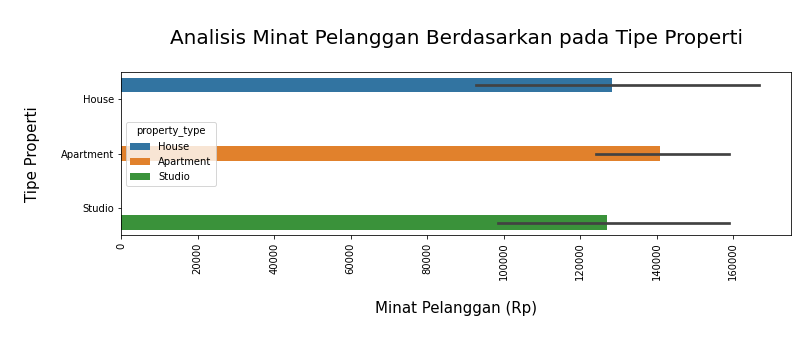

In [ ]:
df["property_type"].replace({0:"House", 1:"Studio", 2:"Apartment"}, inplace=True)

plt.figure(figsize=(12, 3))
sns.barplot(x="loan_amount", y="property_type", hue="property_type", data=df)
plt.xticks(rotation=90)
plt.title('\nAnalisis Minat Pelanggan Berdasarkan pada Tipe Properti\n', size=20)
plt.xlabel('\nMinat Pelanggan (Rp)\n', size=15)
plt.ylabel('\nTipe Properti\n', size=15)
plt.show()

**Interpretasi** : Jadi, dapat disimpulkan bahwa minat pelanggan lebih condong ke properti apartemen daripada perumahan dan studio.

## Analisis pengaruh status perkawinan terhadap jangka waktu meminjam 

In [ ]:
df["married"].replace({0:"No", 1:"Yes"}, inplace=True)
df_join = df[['loan_term_month', 'married']]
df_join.head()

,loan_term_month,married
12,360,Yes
21,360,Yes
26,360,Yes
27,360,Yes
28,360,No


In [ ]:
creditor_status = df.groupby("married")

In [ ]:
for state, frame in creditor_status:
    print(f"First 2 entries for {state!r}")
    print("------------------------")
    print(frame.head(2), end="\n\n")

First 2 entries for 'No'
------------------------
     loan_id  birth_date  ...  self_employed_No self_employed_Yes
28  LP001086  1978-11-21  ...                 1                 0
31  LP001095  1983-09-21  ...                 1                 0

[2 rows x 19 columns]

First 2 entries for 'Yes'
------------------------
     loan_id  birth_date  ...  self_employed_No self_employed_Yes
12  LP001028  1987-11-16  ...                 1                 0
21  LP001046  1984-06-25  ...                 1                 0

[2 rows x 19 columns]



In [ ]:
creditor_status.get_group("Yes").head()

,loan_id,birth_date,phone_number,gender,married,dependents,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes
12,LP001028,1987-11-16,6.281128e+11,Male,Yes,2,3073.0,8106.0,200000,360,30,1.0,0,House,1,1,0,1,0
21,LP001046,1984-06-25,6.285219e+11,Male,Yes,1,5955.0,5625.0,315000,360,30,1.0,0,House,1,1,0,1,0
26,LP001068,1986-09-10,6.281377e+11,Male,Yes,0,2799.0,2253.0,122000,360,30,1.0,0,Apartment,1,1,0,1,0
27,LP001073,1989-02-05,6.281346e+11,Male,Yes,2,4226.0,1040.0,110000,360,30,1.0,1,House,1,0,1,1,0
43,LP001131,1986-11-09,6.287723e+10,Male,Yes,0,3941.0,2336.0,134000,360,30,1.0,0,Apartment,1,1,0,1,0


In [ ]:
state, frame = next(iter(creditor_status))
state

'No'

In [ ]:
frame.head()

,loan_id,birth_date,phone_number,gender,married,dependents,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes
28,LP001086,1978-11-21,6.285222e+10,Male,No,0,1442.0,0.0,35000,360,30,1.0,0,House,0,0,1,1,0
31,LP001095,1983-09-21,6.281348e+11,Male,No,0,3167.0,0.0,74000,360,30,1.0,1,House,0,1,0,1,0
72,LP001248,1986-06-07,6.281149e+11,Male,No,0,3500.0,0.0,81000,300,25,1.0,0,Apartment,1,1,0,1,0
75,LP001255,1980-07-12,6.285211e+11,Male,No,0,3750.0,0.0,113000,480,40,1.0,1,House,0,1,0,1,0
114,LP001392,1986-03-28,6.285210e+10,Female,No,1,7451.0,0.0,126000,360,30,1.0,0,Apartment,1,1,0,0,1


In [ ]:
df.groupby("married")["loan_term_month"].count()

married
No     16
Yes    27
Name: loan_term_month, dtype: int64

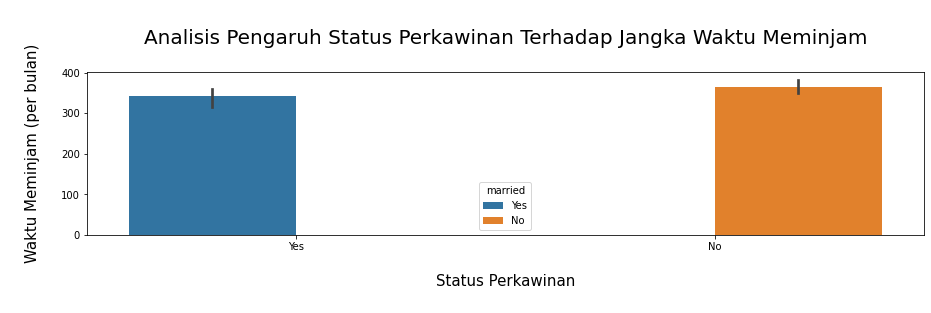

In [ ]:
df["married"].replace({0:"No", 1:"Yes"}, inplace=True)

plt.figure(figsize=(15, 3))
sns.barplot(y="loan_term_month", x="married", hue="married", data=df)
plt.title('\nAnalisis Pengaruh Status Perkawinan Terhadap Jangka Waktu Meminjam\n', size=20)
plt.ylabel('\nWaktu Meminjam (per bulan)\n', size=15)
plt.xlabel('\nStatus Perkawinan\n', size=15)
plt.show()

**Interpretasi** : Jadi, dapat disimpulkan bahwa banyak pelanggan yang belum/tidak menikah justru lebih tinggi daripada yang sudah menikah terhadap jangka waktu meminjamnya.